In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\muheeb\Desktop\learn pandas\data\Pakistan Largest Ecommerce Dataset.csv",low_memory=False)

In [3]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1048575, 26)

# Drop Null Fields

In [5]:
df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1,inplace=True)

# Percentage Of Null Values

In [6]:
percent_of_null_overall = (df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100
f"Null Values Present In Overall data : {percent_of_null_overall}%"

'Null Values Present In Overall data : 44.87935213662987%'

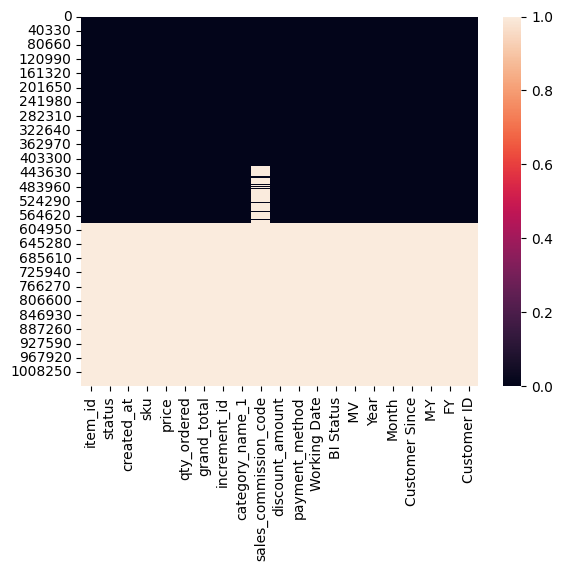

In [7]:
# null values graoh
sns.heatmap(df.isnull())
plt.show()

In [8]:
#drop null rows
df.dropna(how='all',inplace=True)

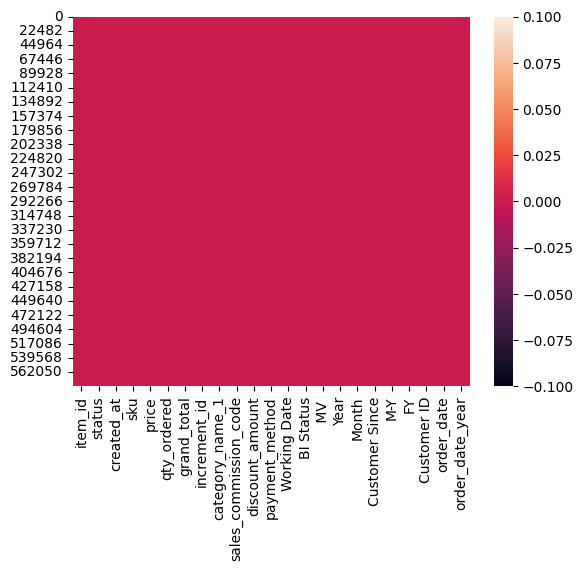

In [56]:
# null values graoh
sns.heatmap(df.isnull())
plt.show()

In [21]:
nulls= df.isnull().sum()

In [11]:
# For categorical columns, fill with mode
columns = ['status','sku','category_name_1','payment_method','Customer Since','sales_commission_code']
for i in columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [20]:
# For Integer columns, fill with mode
cus = ['Customer ID']
for i in cus:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [22]:
nulls

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

# Renaming

In [23]:
# check unique value in status field
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [39]:
# complete,received,cod,cod
df['status']=df['status'].replace(["compeleted","received","cod","paid"],"completed")

In [25]:
# canceled,closed
df['status']=df['status'].replace(["canceled","closed"],"canceled")

In [26]:
# holded,pending,processing,pending_paypal
df['status']=df['status'].replace(["holded","pending","processing","pending_paypal"],"pending")

In [27]:
# refund,order_refunded,fraud,exchange,\\N,payment_review
df['status']=df['status'].replace(["refund","order_refunded","fraud","exchange","\\N","payment_review"],"others")

In [28]:
df['category_name_1'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

In [29]:
# \\N,Others
df['category_name_1']=df['category_name_1'].replace(["\\N","Others"],"others")

In [30]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [31]:
#Seprating Banks & Credit Card Categories
creditcard = ['Payaxis', 'bankalfalah', 'ublcreditcard', 'mcblite', 'internetbanking']
jazzcash = ['jazzwallet', 'jazzvoucher']
easypaisa= ['Easypay', 'Easypay_MA', 'easypay_voucher']
cod= ['cod', 'cashatdoorstep']
Others = ['apg', 'customercredit', 'mygateway','productcredit', 'marketingexpense', 'financesettlement']

df['payment_method'].replace(creditcard, 'Card Payment', inplace=True)
df['payment_method'].replace(jazzcash, 'Jazz Cash', inplace=True)
df['payment_method'].replace(easypaisa, 'Easy Paisa', inplace=True)
df['payment_method'].replace(cod, 'COD', inplace=True)
df['payment_method'].replace(Others, 'Others', inplace=True)


In [32]:
# change type object to date
df['order_date'] = pd.to_datetime(df['created_at'])

In [33]:
# get year from created at
df['order_date_year'] = df['order_date'].dt.year

# Visualization

### Most Sold Category:


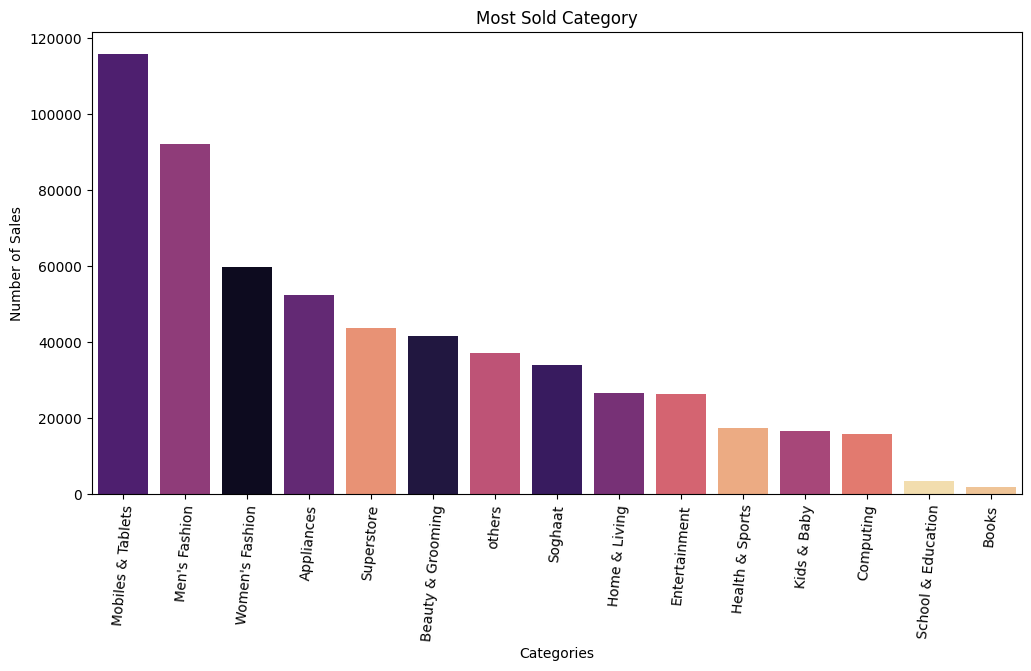

In [34]:
cat_count = df['category_name_1'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6)) # Adjust graph size

sns.countplot(data=df, x='category_name_1',order=cat_count.index ,hue='category_name_1',palette='magma')

plt.title("Most Sold Category")

plt.xlabel('Categories')  # x axis label

plt.ylabel('Number of Sales') # y axis label

plt.xticks(rotation=85) # categories name rotate 85degree

plt.show()

# Top 3 Category sale

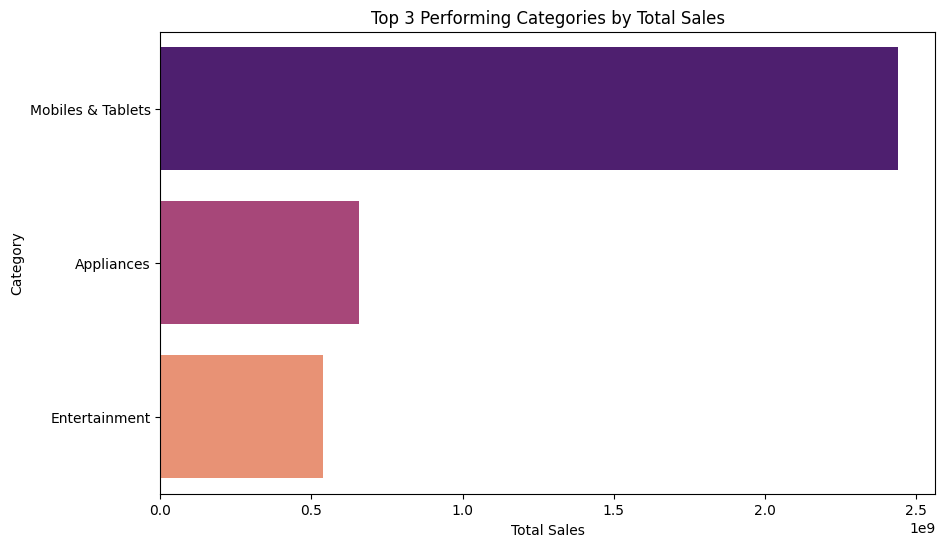

In [35]:
plt.figure(figsize=(10, 6)) # Adjust graph size

total_sales_per_category = df.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(3)

total_sales_category = total_sales_per_category.reset_index()

sns.barplot(data=total_sales_category, x='grand_total', y='category_name_1', palette='magma',hue='category_name_1',)

plt.xlabel('Total Sales')

plt.ylabel('Category')

plt.title('Top 3 Performing Categories by Total Sales')

plt.show()

# Average Discount Sale Per Category

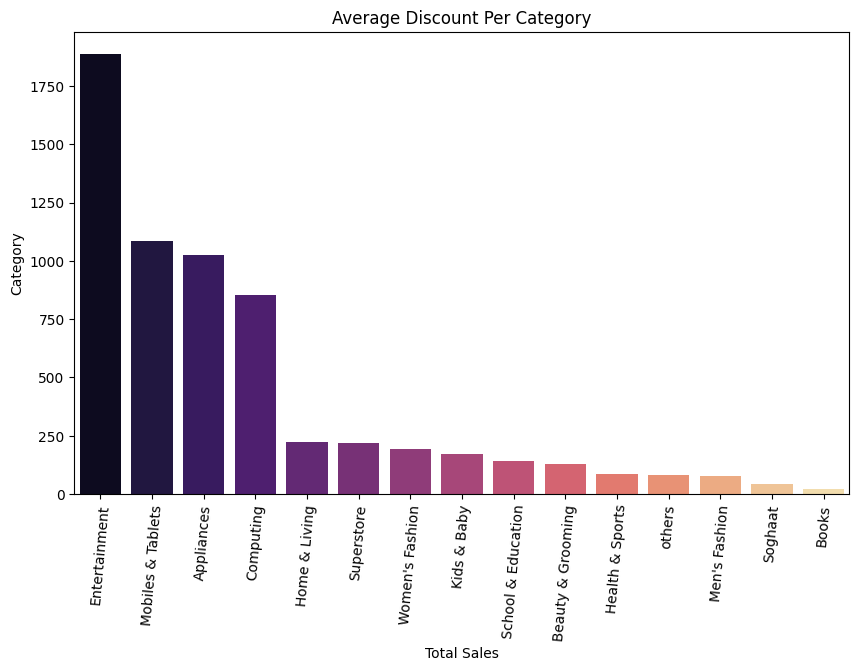

In [36]:
plt.figure(figsize=(10, 6)) # Adjust graph size

average_discount_per_category = df.groupby('category_name_1')['discount_amount'].mean().sort_values(ascending=False)

average_discount_category = average_discount_per_category.reset_index()

sns.barplot(data=average_discount_category, y='discount_amount', x='category_name_1', palette='magma',hue='category_name_1',)

plt.title('Average Discount Per Category')

plt.xlabel('Total Sales')

plt.ylabel('Category')

plt.xticks(rotation=85) # categories name rotate 85degree

plt.show()

# Average Sales per year

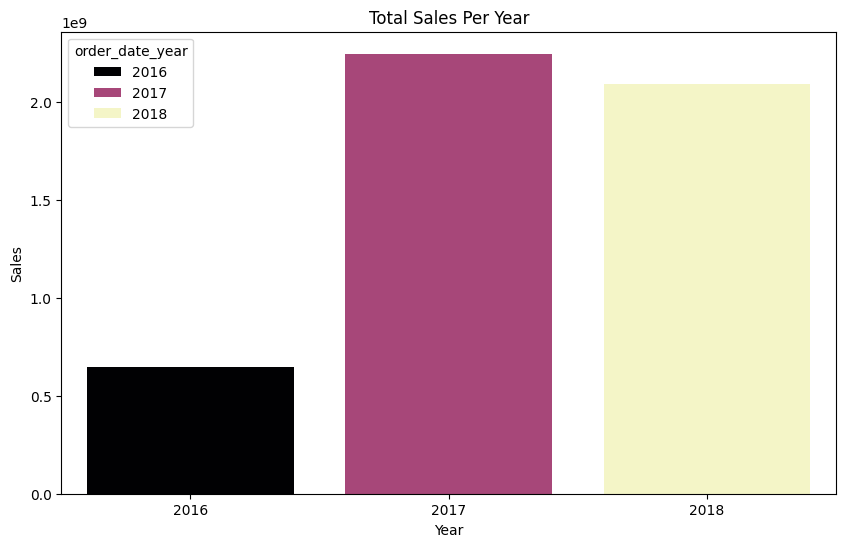

In [37]:
plt.figure(figsize=(10, 6))  # Adjust graph size

sales_per_year = df.groupby('order_date_year')['grand_total'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot
sns.barplot(data=sales_per_year, x='order_date_year', y='grand_total', hue='order_date_year', palette='magma')

plt.title('Total Sales Per Year')

plt.xlabel('Year')

plt.ylabel('Sales')

plt.show()

# Most Used Payment Method

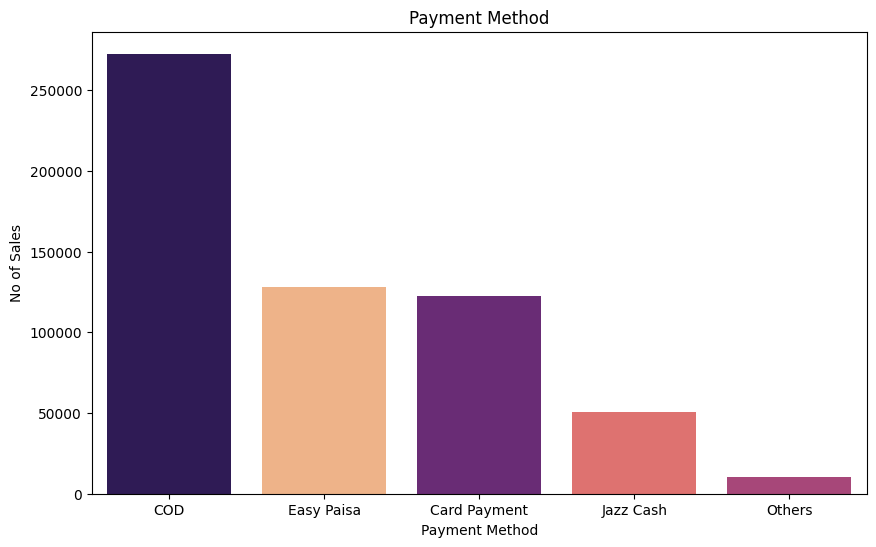

In [38]:
plt.figure(figsize=(10, 6))  # Adjust graph size

payment_method =  df['payment_method'].value_counts().sort_values(ascending=False)

# Create the bar plot
sns.countplot(data=df, x='payment_method',order=payment_method.index, hue='payment_method', palette='magma')

plt.title('Payment Method')

plt.xlabel('Payment Method')

plt.ylabel('No of Sales')

plt.show()

# Order Status

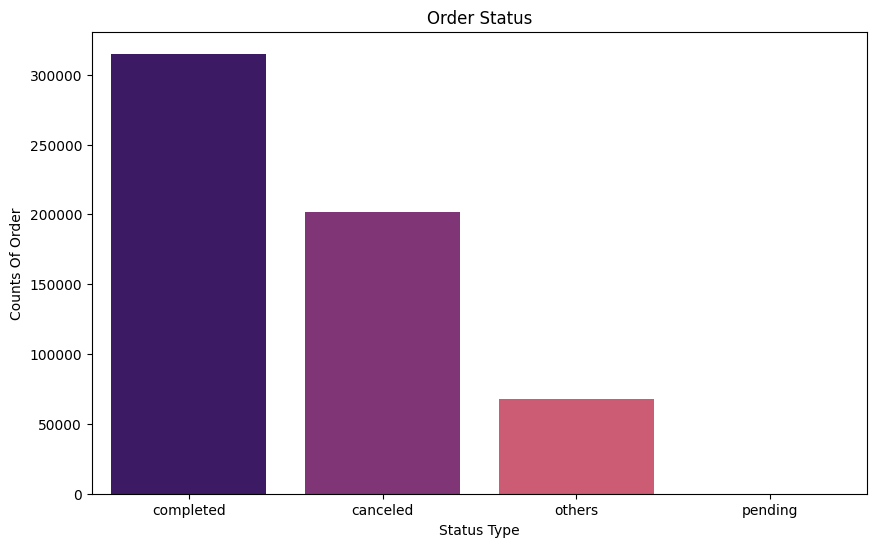

In [40]:
plt.figure(figsize=(10, 6))  # Adjust graph size

status =  df['status'].value_counts().sort_values(ascending=False)

# Create the bar plot
sns.countplot(data=df, x='status',order=status.index, hue='status', palette='magma')

plt.title('Order Status')

plt.xlabel('Status Type')

plt.ylabel('Counts Of Order')

plt.show()

# KPI's

In [42]:
def convert_to_billion(number):
    #  number less than 1000, return
    if abs(number) < 1000:
        return str(number)
    
    # number less than 1 million, "K" (thousand) units 
    elif abs(number) < 1e6:
        scaled_number = number / 1e3
        return f"{scaled_number:.2f}K"
    
    # number less than 1 billion, "M" (million) units 
    elif abs(number) < 1e9:
        scaled_number = number / 1e6
        return f"{scaled_number:.2f}M"
    elif abs(number) < 1e12:
        scaled_number = number / 1e9
        return f"{scaled_number:.2f}B"
    
    # number greater than or equal to 1 trillion,  "T" (trillion) units 
    else:
        scaled_number = number / 1e12
        return f"{scaled_number:.2f}T"


In [43]:
# Sale for Mobiles & Tablets:
mobiles_tablets_sales = df[df['category_name_1'] == 'Mobiles & Tablets']['grand_total'].sum()
print("Total sales of Mobiles & Tablets category:", convert_to_billion(mobiles_tablets_sales))

Total sales of Mobiles & Tablets category: 2.44B


In [51]:
# Total Sales per year
total_sales = df.groupby('order_date_year')['grand_total'].sum().reset_index()
total_sales['grand_total_billion'] = total_sales['grand_total'].map(convert_to_billion)
round(total_sales)

,order_date_year,grand_total,grand_total_billion
0,2016,6.455853e+08,645.59M
1,2017,2.247266e+09,2.25B
2,2018,2.093500e+09,2.09B


In [52]:
# Calculate the number of orders by year
df.groupby('order_date_year')['increment_id'].nunique().reset_index()

,order_date_year,increment_id
0,2016,107668
1,2017,185837
2,2018,115277


In [53]:
# status for order
order_status = df['status'].value_counts().sort_values(ascending=False)
order_status.map(convert_to_billion)

completed    315.01K
canceled     201.74K
others        67.65K
pending          119
Name: status, dtype: object

In [55]:
# payment method
payment_method = df[df['payment_method'] == 'COD']['payment_method'].value_counts()
payment_method 
# order_status.map(payment_method)

COD    272692
Name: payment_method, dtype: int64

In [60]:
grand_total = df['grand_total'].sum()

convert_to_billion(grand_total)

'4.99B'

# Conclusion

#### 1. The Mobiles & Tablets category stands out as the top-selling segment, with a remarkable total sales figure of 2.44 billion


#### 2. Number of orders over the years

#####    . In 2016, we processed a total of 107,668 orders.
#####    . This number increased notably in 2017, reaching 185,837 orders.
#####    . Despite a slight decrease in 2018, we still managed to process 115,277 orders.


#### 3.  Total sales per year

#####    . In 2016, our total sales amounted to (645.59 million)
#####    . In 2017, our sales (2.25 billion), marking a substantial increase from the previous year.
#####    . Although there was a slight decline in sales in 2018, we maintained a substantial figure of (2.09 billion).

#### 4.  Order Status

#####    . Completed: 315.01K
#####    . Canceled: 201.74K
#####    . Others: 67.65K

#### 5.  The top 3 performing categories

#####    . Mobiles & Tablets:  2.44 billion
#####    . Appliances: 656.85 million
#####    . Entertainment: 539.05 million


#### 6.  Payment Methods

#####    . The majority of cases involve Cash on Delivery (COD)